# Trading Players, Player Performance, and Prediction of Success in Making it to the NBA Finals

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Alexis Garduno
- James Daza
- Jamie Wei
- Aleksander Archipov

<a id='research_question'></a>
# Research Question

- Does the number of times a player is traded predict that player's performance (e.g. average total points scored/game, average minutes played/game, etc) in an NBA game? 
- Also, does the trade rate (e.g. number of players traded within a team/season) of a NBA team affect the likelihood that the team will reach the NBA finals (evidenced by the last 20 years of NBA games)?

<a id='background'></a>

## Background & Prior Work

#### Background

The NBA is a high-tension business, where is each team is constantly fighting to maintain only the highest skilled players.  While the top 25 big hitters tend to remain relatively static, the rest of the 450+ players in the league can come and go at any moment.  This can have a great impact on the team and the players.  Trades in the NBA are quite complex, dealing with variables such as salary cap, the NBA collective bargaining agreement(CBA), as well as the team's personal needs.  Some research has already been done on the effects of trades on NBA teams as well as work on predicting factors in NBA player and team success.   

The NBA is also a very stat-heavy sport. NBA games are decided by whichever team has the most points. However, that doesn’t mean Basketball is just about outsourcing your opponent. There are many other factors that are looked upon. Mainly: assists, rebounds, blocks, steals, and turnovers. Each of these variables could be a factor in increasing the points of a team. Assists count when an NBA player passes the ball to another player and that player manages to score some points. A rebound is when another player attempts a shot, and the player catches the ball as it's falling down. A block is when a player manages to deflect a player's shot from his goal. A steal is when a player manages to gain possession from the other team. Finally, a turnover is when a player loses control of the ball, and the opposing team gains possession. Obviously, it is better to have higher stats in all of the mentioned above except turnovers. In this study, we will be looking at these stats and many others to determine how a player is performing in a season. 

#### Prior Work

In a 2020 article by Michael C. Wright (Reference 1), Wright talks to players about the effect that trades can have on the team's morale.  Players mentioned how close wins and tough losses throughout a season can create strong bonds and chemistry between players.  Teams with good chemistry are generally more successful and thus make it closer to the Finals.  The NBA veterans note that it is something they can get used to.  For instance, early in their career, it can have a big impact on how they play, but as they get older they realize it is just a part of the business and it does not affect them as much.  Even still, players that might play together for 5 or more years can easily be separated at any time.  

Work on predicting NBA results has been done before.  The website fivethirtyeight.com (Reference 2) uses player projections that take into account factors, such as physiological, scoring, tendencies, passing, and defense, among other variables.  This data is compared to past NBA players to predict that player's season.  The site then runs simulations on this data to form predicted season statistics for each team.  While this is a reasonable predictor, it fails to take into consideration any phycological factors that can arise from trading, as mentioned previously.

Another source we looked at (Reference 3) found the most important stats when looking at team performances. Generally, a lot of team performance can’t be calculated into a number, however, this website managed to find a correlation between some stats and the likelihood of winning. They specifically looked at Rebounds, Turnovers, Field goal %, Free throw %, and Fouls. They found that the team with the higher Field goal % is 75% more likely to win the game and that the team with the highest Free throw % is 70% more likely to win. However, just because these stats may be higher for some teams, it doesn't always mean they will win the game.

References (include links):
- 1) https://www.nba.com/news/trade-deadline-when-friends-are-dealt
- 2) https://projects.fivethirtyeight.com/nba-trades-2022/
- 3) https://www.oskeimsportspicks.com/nba-stats/#:~:text=In%20addition%20to%20winning%20three%20of%[…]so%20why%20put%20them%20first%20on%20the%20list%3F

# Hypothesis


We expect that an NBA player who is traded more than an average NBA player at their point of their career (in terms of years in the NBA) will score less points/game, play less time/game, and have worse performance on average. Teams with NBA players who are traded more than an average player at a similar point in their career will be less likely to make it to the NBA finals.

# Dataset(s)

#### Source Name: NBA_API
- Link to the dataset: https://github.com/swar/nba_api
- Number of observations: N/A
- API Client that allows access to various NBA's stats API endpoints

#### Source Name: NBA Stats
- Link to the dataset: https://www.nba.com/stats/
- Player stats from 10 random teams ranging from 2016-2021

We began with two sources, primarily relying on the NBA_API to construct datastreams. We performed some simple quality checks to ensure that the dataset we pulled from the NBA_API was consistent with the data shown on the NBA stats site.

##### Description of Datasets from the NBA_API
- **Player Game Logs**: This dataset is a list of a player's performance in every game. Each row is uniquely defined as a player's performance in an individual game over five seasons worth of games. This data was imported in this step (from nba_api.stats.endpoints import playergamelogs). We identified games from this dataframe from 2016 to 2021. This same dataset was used to determine whether a player was traded, which is the primary independent variable of interest.


##### Dataset Columns from the NBA_API

- **Points Per Game (PTS)**: the amount of points a player scores per games that they play
- **Assists Per Game (AST)**: the amount of times a player pass the ball to a teammate and they score
- **Offensive Rebounds Per Game (OREB)***: the amount of times a player obtains the ball off a miss on offensive.
- **Defensive Rebounds Per Game (DREB)***: the amount of times a player obtains the ball off a miss on offensive.
- **Steals Per Game (STL)**: the amount of times a player obtains the ball from the opponent. Either by intercepting the pass or hitting the ball out of their opponenets hands.
- **Blocks Per Game (BLK)**: the amount of times a player manges to stop the ball after their opponent attempts a shot
- **Field Goal Percentage (FG_PCT)**: the amount of times a player makes the ball vs how many they attempt
- **Free Throw Percentage (FT_PCT)**: the amount of times a player makes the ball in freethrow vs how many they attempt
- **Field Goals Made (FMG)**: the amount of goals a player hits in the game
- **Three Pointers Made (FG3_PCT)**: the amount of times a player scores a basket outside of the three pointer line

#### Dataset: PlayerStats Team Ranking 
- ***Description:*** This dataset contains a player's performance for an individual season; each row is uniquely defined for a player's performance for that team in an individual season. Each player's stat will be averaged per game. If players were traded in the middle of the season, there would be two rows per player. This dataset also contains information about how often players were traded in a given season. This dataset was merged to team performance statistics, largely team rankings over an individual season. This dataset has a header of "working dataset."
- ***Observations:*** 2,892 players per season

##### Dataset Columns from PlayerStats Team Ranking

- **PCT_Year**: This is the percent of games that a team won in an individual season.
- **WINS_Year**: This is the total number of games won in an individual season.

##### Overview of Combing Datasets

We took the dataset with information about the player for an individual game and merged it with the team's performance in a season. For each player, there's information about how the team performed in a given season. 

# Setup

In [23]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings(action='once')

#background
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
#Import the roster of teams from the NBA API
from nba_api.stats.static import teams
#Pull all games for all ten teams
#Documentation for this endpoint: 
#https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/leaguegamefinder.md
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playergamelogs

#graphics packages
import matplotlib
import matplotlib.pyplot as plt
#statistical analysis
from scipy.stats import rankdata
from scipy import stats

import seaborn as sns

#linear mixed model package
#!pip install -q statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data Cleaning

In this section, we will detail the data management steps taken to prepare for the analysis. In the gathering team section, we wanted to see which teams were represented in this dataset, and this dataset is a sort of key that provides us with the name of the teams for each individaul abbreviation. For example, NOP stands for the New Orleans Pelicans. The remainder of the steps detailed below involve gathering information about an individual player at the game-level. Also, if a player's team changed between games in an individual season, then we classified that individual as having been traded.

### Gathering Teams

We are investigating which teams are represented in this dataset, and we are obtaining a full list of all abbreviations - we needed abbreviations to identify team statistics. We are using this dataset to confirm how teams are identified across NBA_API datasets. In the early stages of the project, we were not sure whether we would be blocked by the API if we accessed data from all of the teams at the same time, so we explored possibly reducing the dataset and maintaining its external validity by randomly sampling team names. This proved unnecessary towards the end of the project.

In [10]:
nba_teams = teams.get_teams()

In [11]:
nba_teams_df=pd.DataFrame(nba_teams)
team_id=nba_teams_df['id'] #this is the unique team id
team_id_random=np.random.choice(team_id,10,replace=False) #identify ten team ids
nba_teams_rdf=nba_teams_df[nba_teams_df['id'].isin(team_id_random)] #df of 10 randomly selected teams
nba_teams_rdf #ended up extending the analysis to all teams

,id,full_name,abbreviation,nickname,city,state,year_founded
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948
16,1610612753,Orlando Magic,ORL,Magic,Orlando,Florida,1989
18,1610612755,Philadelphia 76ers,PHI,76ers,Philadelphia,Pennsylvania,1949
20,1610612757,Portland Trail Blazers,POR,Trail Blazers,Portland,Oregon,1970
21,1610612758,Sacramento Kings,SAC,Kings,Sacramento,California,1948
23,1610612760,Oklahoma City Thunder,OKC,Thunder,Oklahoma City,Oklahoma,1967
25,1610612762,Utah Jazz,UTA,Jazz,Utah,Utah,1974
28,1610612765,Detroit Pistons,DET,Pistons,Detroit,Michigan,1948


### Requesting Games
We requested games and game_ids from the teams identified; we ended up not using this dataset, but we keep it here for reference. The primary dataset that we use is the player logs dataset. Yet, identifying our preferred dataset, required comparing and contrasting very similar datasets under the NBA_API.

In [12]:
# Query for games from the League Game Finder
gamefinder=pd.DataFrame()
for i in team_id_random:
    time.sleep(1) #delay to prevent being blocked from the API
    df = leaguegamefinder.LeagueGameFinder(team_id_nullable=[i]).get_data_frames()[0] #parameter of team ids given
    gamefinder = pd.concat([df,gamefinder])

In [13]:
#Game Statistics

#One row corresponds to one game and one team.
#There will be two rows per game, since there are two teams that played each other.
#Will need to exclude duplicate rows (XXXX will remove duplicate rows)
print(list(set(gamefinder.TEAM_ID))) #confirmed that identified 10 different teams
print(gamefinder.shape) #31,386 games

##Game Finder Dataset: This dataset will be used as the outcome when we look at the association between 
##the exposure and outcome relationship. 
gamefinder

[1610612740, 1610612742, 1610612747, 1610612753, 1610612755, 1610612757, 1610612758, 1610612760, 1610612762, 1610612765]
(33059, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612757,POR,Portland Trail Blazers,0022100990,2022-03-09,POR @ UTA,L,240,85,...,0.818,9.0,27.0,36,19,4.0,2,9,23,-38.0
1,22021,1610612757,POR,Portland Trail Blazers,0022100971,2022-03-07,POR @ MIN,L,240,81,...,0.737,8.0,34.0,42,11,10.0,5,17,30,-43.0
2,22021,1610612757,POR,Portland Trail Blazers,0022100958,2022-03-05,POR @ MIN,L,238,121,...,0.833,11.0,30.0,41,24,5.0,1,15,23,-14.0
3,22021,1610612757,POR,Portland Trail Blazers,0022100939,2022-03-02,POR @ PHX,L,240,90,...,0.760,5.0,30.0,35,22,10.0,2,18,23,-30.0
4,22021,1610612757,POR,Portland Trail Blazers,0022100918,2022-02-27,POR vs. DEN,L,239,92,...,0.692,11.0,31.0,42,22,12.0,3,15,25,-32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,22002,1610612740,NOH,New Orleans Hornets,0020200077,2002-11-08,NOH vs. GSW,W,240,110,...,0.821,17.0,26.0,43,20,8.0,5,13,20,6.0
1813,22002,1610612740,NOH,New Orleans Hornets,0020200063,2002-11-06,NOH vs. SEA,W,241,86,...,0.600,15.0,30.0,45,24,8.0,3,14,20,2.0
1814,22002,1610612740,NOH,New Orleans Hornets,0020200036,2002-11-02,NOH vs. MIA,W,240,100,...,0.818,14.0,27.0,41,19,9.0,5,8,23,4.4
1815,22002,1610612740,NOH,New Orleans Hornets,0020200025,2002-11-01,NOH @ CHI,L,240,79,...,0.714,14.0,25.0,39,18,11.0,5,14,22,-5.0


### Player Logs 

This is the primary dataset that we use for the remainder of the analysis; we request all the player stats from seasons ranging from 2016-2021. This is where get information on total assists and total blocks. We have to generate a dataset with a time period specified that defines a season. Supplying the date range and the season for the query are necessary to return player performance statistics.

In [14]:
#get game ids for the last five years

#generate a parameter dataframe to define timeframe
season_parameter_df=pd.DataFrame({'Season':['2016-17','2017-18','2018-19','2019-20','2020-21'], 
                    'Date_From':['9/01/2016','9/01/2017','9/01/2018','9/01/2019','9/01/2020'],
                    'Date_To':['8/31/2017','8/31/2018','8/31/2019','8/31/2020','8/31/2021']})

#will obtain no game ids, without the season_nullable and date_nullable items selected
logsdf=pd.DataFrame()
for i in list(range(1, 5)):
    time.sleep(1)
    season=season_parameter_df.iloc[i][0]
    date_from=season_parameter_df.iloc[i][1]
    date_to=season_parameter_df.iloc[i][2]
    
    logs = pd.DataFrame(playergamelogs.PlayerGameLogs(
        season_nullable = season,
        date_from_nullable = date_from,                                                     
        date_to_nullable = date_to
    ).player_game_logs.get_data_frame())
    logsdf = pd.concat([logs,logsdf])

In this dataset, we see that 4599 games are captured for 875 indiivdual players with a total of 97,655 rows (player-game).

In [15]:
#unique set of game ids
game_ids = list(set(logsdf['GAME_ID'])) #not sure if we need game_ids
player_ids = pd.DataFrame(list(set(logsdf['PLAYER_ID'])))
print(pd.DataFrame(game_ids).shape) #4599 game ids
print(player_ids.shape) #875 unique players
print(logsdf.shape) #97,655 rows where each row is for each player in each game. 

(4599, 1)
(875, 1)
(97655, 66)


All the columns of every player that played in the seasons we selected from the random teams chosen

In [16]:
#preview, likely not use these columns
logsdf.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

# Data Cleaning

### Cleaning Player Logs

We restrict the dataset to the variables that we are using for the analysis.

In [17]:
# Copy Logs DataFrame and remove TEAM ID's that were not selected
logsDf = logsdf.copy()


# Restrict to the player stats we want
logsDf = logsDf[['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'MIN', 'FG_PCT', 'FT_PCT', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'PLUS_MINUS']]
logsDf

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,MIN,FG_PCT,FT_PCT,PTS,AST,REB,STL,BLK,PLUS_MINUS
0,2020-21,1627827,Dorian Finney-Smith,1610612742,Dallas Mavericks,28.305000,0.667,0.000,15,1,4,0,0,-14
1,2020-21,1629731,Dean Wade,1610612739,Cleveland Cavaliers,35.250000,0.500,0.000,18,3,8,1,0,-25
2,2020-21,1630173,Precious Achiuwa,1610612748,Miami Heat,41.566667,0.625,0.429,23,0,10,2,1,6
3,2020-21,1629640,Keldon Johnson,1610612759,San Antonio Spurs,21.516667,0.500,0.500,9,4,4,1,0,-4
4,2020-21,1628382,Justin Jackson,1610612749,Milwaukee Bucks,32.616667,0.333,0.500,9,1,6,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26102,2017-18,2733,Shaun Livingston,1610612744,Golden State Warriors,18.545000,0.400,1.000,6,5,1,0,0,-8
26103,2017-18,201569,Eric Gordon,1610612745,Houston Rockets,29.383333,0.563,0.750,24,1,1,1,2,16
26104,2017-18,2585,Zaza Pachulia,1610612744,Golden State Warriors,10.233333,1.000,1.000,6,0,3,0,1,8
26105,2017-18,203935,Marcus Smart,1610612738,Boston Celtics,35.050000,0.313,0.667,12,3,9,2,2,-8


### Cleaning boxstats
### Saving Data 
Now we save the data we gathered we requested from the NBA API into csv files

In [18]:
#Saving the Data to a csv file
logsDf.to_csv("logPlayerStats.csv")

# NEED TO RUN BOXSTATS REQUEST BLOCK FIRST
# boxscfinder.to_csv("boxscfinder.csv")

### Data Manipulation

The player logs dataset is then taken and the number of times a player is traded is counted per an individual season.

In [19]:
dataDf = pd.read_csv("logPlayerStats.csv")
#dataDf['TIMES_TRADED'] = np.nan
pid_lst = list(player_ids[0])
pid_lst[0]

season = ['2016-17','2017-18','2018-19','2019-20','2020-21']

playerStats = pd.DataFrame()
for pid in pid_lst:
    time.sleep(1)
    career = playercareerstats.PlayerCareerStats(player_id=pid)
    temp = career.get_data_frames()[0]
    temp = temp[temp['SEASON_ID'].isin(season)]
    playerStats = playerStats.append(temp)

In [20]:
season = ['2016-17','2017-18','2018-19','2019-20','2020-21']
for s in season:
    playerStats["Traded " + s] = 0
    
for pid in pid_lst:
    for s in season:
        tempDf = dataDf.loc[(dataDf['PLAYER_ID'] == pid) & (dataDf['SEASON_YEAR'] == s)]
        tempDf = tempDf.reset_index(drop=True)
        tempDf = tempDf.drop_duplicates(subset=['TEAM_ID'])
        traded = len(tempDf.index)-1
        
        if traded >= 0:
            playerStats.loc[(playerStats['PLAYER_ID'] == pid), ["Traded " + s]] = traded
        else:
            playerStats.loc[(playerStats['PLAYER_ID'] == pid), ["Traded " + s]] = 0

In [21]:
playerStats = playerStats.reset_index(drop=True)
playerStats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21
0,1630208,2020-21,00,1610612766,CHA,23.0,18,0,63.0,4,...,0,0,3,7,15,0,0,0,0,0
1,202714,2016-17,00,1610612762,UTA,27.0,55,9,1205.0,170,...,42,3,90,100,430,0,0,1,0,0
2,202714,2017-18,00,1610612753,ORL,28.0,69,3,1365.0,178,...,54,8,89,91,473,0,0,1,0,0
3,202714,2018-19,00,1610612763,MEM,29.0,53,3,1204.0,161,...,45,4,62,81,421,0,0,1,0,0
4,202714,2018-19,00,1610612766,CHA,29.0,4,0,42.0,2,...,2,0,4,3,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,1630203,2020-21,00,1610612766,CHA,24.0,7,0,27.0,8,...,1,0,1,0,18,0,0,0,0,0
3214,1630204,2020-21,00,1610612750,MIN,21.0,2,0,4.0,0,...,0,0,1,0,0,0,0,0,0,0
3215,1630205,2020-21,00,1610612739,CLE,23.0,40,0,499.0,62,...,17,13,23,53,165,0,0,0,0,0
3216,1630206,2020-21,00,1610612746,LAC,20.0,4,1,84.0,14,...,4,0,7,5,35,0,0,0,0,0


After we add the traded variable, the dataset is saved to a csv since it takes some time to run the data cleaning section.

In [22]:
playerStats.to_csv("PlayerStats.csv")

In [23]:
playerStats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21
0,1630208,2020-21,00,1610612766,CHA,23.0,18,0,63.0,4,...,0,0,3,7,15,0,0,0,0,0
1,202714,2016-17,00,1610612762,UTA,27.0,55,9,1205.0,170,...,42,3,90,100,430,0,0,1,0,0
2,202714,2017-18,00,1610612753,ORL,28.0,69,3,1365.0,178,...,54,8,89,91,473,0,0,1,0,0
3,202714,2018-19,00,1610612763,MEM,29.0,53,3,1204.0,161,...,45,4,62,81,421,0,0,1,0,0
4,202714,2018-19,00,1610612766,CHA,29.0,4,0,42.0,2,...,2,0,4,3,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,1630203,2020-21,00,1610612766,CHA,24.0,7,0,27.0,8,...,1,0,1,0,18,0,0,0,0,0
3214,1630204,2020-21,00,1610612750,MIN,21.0,2,0,4.0,0,...,0,0,1,0,0,0,0,0,0,0
3215,1630205,2020-21,00,1610612739,CLE,23.0,40,0,499.0,62,...,17,13,23,53,165,0,0,0,0,0
3216,1630206,2020-21,00,1610612746,LAC,20.0,4,1,84.0,14,...,4,0,7,5,35,0,0,0,0,0


In [24]:
playerStats[playerStats['PLAYER_ID'] ==1626144 ]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21
60,1626144,2016-17,00,1610612743,DEN,21.0,55,41,1406.0,208,...,41,13,123,95,603,0,1,0,0,0
61,1626144,2017-18,00,1610612743,DEN,22.0,42,0,752.0,129,...,21,4,72,47,359,0,1,0,0,0
62,1626144,2017-18,00,1610612752,NYK,22.0,22,14,493.0,75,...,20,7,41,33,194,0,1,0,0,0
63,1626144,2017-18,00,0,TOT,22.0,64,14,1244.0,204,...,41,11,113,80,553,0,1,0,0,0
64,1626144,2018-19,00,1610612752,NYK,23.0,59,42,1607.0,330,...,43,19,140,103,873,0,1,0,0,0
65,1626144,2019-20,00,1610612762,UTA,24.0,54,2,850.0,151,...,24,10,76,72,395,0,1,0,0,0


In [25]:
season_stats = pd.DataFrame()
for pid in pid_lst:
    time.sleep(1)
    career = playercareerstats.PlayerCareerStats(player_id=pid)
    temp = career.career_totals_regular_season.get_data_frame()
    season_stats = season_stats.append(temp)  

In [26]:
season_stats

,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630208,00,0,62,5,411.0,60,92,0.652173,0,...,0.685185,34,58,92,15,9,19,24,56,157
0,202714,00,0,456,56,8393.0,1165,2752,0.423328,302,...,0.731462,118,776,894,1421,300,24,560,568,2997
0,1630210,00,0,63,1,347.0,68,183,0.371584,41,...,0.833333,1,27,28,24,11,1,24,34,197
0,1630211,00,0,10,0,88.0,3,13,0.230769,1,...,0.800000,1,13,14,4,0,2,3,10,11
0,1630214,00,0,101,12,1608.0,239,457,0.522975,30,...,0.643564,121,253,374,115,85,47,72,167,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1630203,00,0,7,0,27.0,8,12,0.666666,2,...,0.000000,0,1,1,3,1,0,1,0,18
0,1630204,00,0,2,0,4.0,0,0,0.000000,0,...,0.000000,0,0,0,0,0,0,1,0,0
0,1630205,00,0,87,8,1165.0,156,337,0.462908,17,...,0.690721,54,144,198,53,37,24,50,121,396
0,1630206,00,0,22,1,206.0,32,82,0.390243,8,...,0.800000,4,26,30,9,8,3,14,14,84


In [27]:
season = ['2016-17','2017-18','2018-19','2019-20','2020-21']
for s in season:
    season_stats["Traded " + s] = 0
    
for pid in pid_lst:
    for s in season:
        tempDf = dataDf.loc[(dataDf['PLAYER_ID'] == pid) & (dataDf['SEASON_YEAR'] == s)]
        tempDf = tempDf.reset_index(drop=True)
        tempDf = tempDf.drop_duplicates(subset=['TEAM_ID'])
        traded = len(tempDf.index)-1
        
        if traded >= 0:
            season_stats.loc[(season_stats['PLAYER_ID'] == pid), ["Traded " + s]] = traded

        else:
            season_stats.loc[(playerStats['PLAYER_ID'] == pid), ["Traded " + s]] = 0

In [28]:
season_stats.to_csv("careerStats_v2.csv")

# Data Analysis & Results

In this dataset analysis section, we can run this section in isolation after the set-up, so we don't have to rerun the data cleaning cells. First, we import the data from the earlier steps; then, we do exploratory data analysis and visualization to explore the dataset and check the distribution of variables for later analyses; the final section includes the main statistical analyses.

# Dataset

### Gathering Teams
This dataset shows the team roster and will be used as the key to merge the team standings over a season with player-level performance statistics. This dataset serves as a key or linker file between datasets.

In [24]:
nba_teams = teams.get_teams()
#Obtain a full list of all abbreviations - will need abbreviations to identify team statistics
nba_teams_df=pd.DataFrame(nba_teams)
nba_teams_df.head(10)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


### PlayersStats Import (Data)

PlayerStats dataset is shown below, where each row correponds to a player's performance on a given team in an individual season. Since we are looking at the number of players who were traded in a given season, we calculated the number of times that player was traded in a given season. There will be two rows for an individual for an individual season if they were traded teams mid-season.

In [25]:
dataDf = pd.read_csv("PlayerStats.csv")
print(dataDf.shape) #total number of observations
dataDf=dataDf.merge(nba_teams_df, left_on='TEAM_ID', right_on='id')

#change variables in terms of average performance over the game
game_stats= ['MIN', 'PTS', 'FGM', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK']

dataDf=dataDf.assign(MIN=dataDf.get('MIN')/dataDf.get('GP'))
dataDf=dataDf.assign(PTS=dataDf.get('PTS')/dataDf.get('GP'))
dataDf=dataDf.assign(FGM=dataDf.get('FGM')/dataDf.get('GP'))
dataDf=dataDf.assign(FG_PCT=dataDf.get('FG_PCT')/dataDf.get('GP'))
dataDf=dataDf.assign(FG3_PCT=dataDf.get('FG3_PCT')/dataDf.get('GP'))
dataDf=dataDf.assign(FT_PCT=dataDf.get('FT_PCT')/dataDf.get('GP'))
dataDf=dataDf.assign(OREB=dataDf.get('OREB')/dataDf.get('GP'))
dataDf=dataDf.assign(DREB=dataDf.get('DREB')/dataDf.get('GP'))
dataDf=dataDf.assign(AST=dataDf.get('AST')/dataDf.get('GP'))
dataDf=dataDf.assign(STL=dataDf.get('STL')/dataDf.get('GP'))
dataDf=dataDf.assign(BLK=dataDf.get('BLK')/dataDf.get('GP'))

dataDf = dataDf.drop(columns=['Unnamed: 0','id'])
print(dataDf.shape) #QA check (group ids dropped that were not in original roster)
print(list(set(dataDf.get('nickname')))) #names in dataset
dataDf.head(10)

(3218, 33)
(2892, 38)
['76ers', 'Jazz', 'Magic', 'Pistons', 'Hawks', 'Warriors', 'Bucks', 'Knicks', 'Trail Blazers', 'Suns', 'Cavaliers', 'Nuggets', 'Hornets', 'Spurs', 'Nets', 'Heat', 'Grizzlies', 'Bulls', 'Mavericks', 'Pelicans', 'Celtics', 'Timberwolves', 'Thunder', 'Raptors', 'Clippers', 'Wizards', 'Lakers', 'Pacers', 'Rockets', 'Kings']


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21,full_name,abbreviation,nickname,city,state,year_founded
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
1,202714,2018-19,0,1610612766,CHA,29.0,4,0,10.500000,0.500000,...,0,1,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
2,1626163,2016-17,0,1610612766,CHA,24.0,75,16,26.053333,4.266667,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
3,1626163,2017-18,0,1610612766,CHA,25.0,79,4,23.227848,3.886076,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
4,1626163,2018-19,0,1610612766,CHA,26.0,47,0,16.063830,2.936170,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
5,1630268,2020-21,0,1610612766,CHA,22.0,7,0,3.714286,0.285714,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
6,1626179,2019-20,0,1610612766,CHA,26.0,63,63,34.365079,6.317460,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
7,1626179,2020-21,0,1610612766,CHA,27.0,69,69,34.536232,7.391304,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
8,1626174,2016-17,0,1610612766,CHA,21.0,13,0,8.230769,0.923077,...,0,1,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
9,1626195,2017-18,0,1610612766,CHA,24.0,22,1,11.909091,1.909091,...,1,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988


### Import Ranking Data Reflecting Overall Team Performance (Data)

In [26]:
#import the NBA team ranks to reflect overall performance
NBA_team_rank=pd.read_csv("NBAstanding.csv")

#retired code from prior data checkpoint

#dictionary to facilitate merging the player-level information with team ranking information
# team_dict = {'76ers':'Philadelphia 76ers','Kings': 'Sacramento Kings',
#              'Minnesota Timberwolves':'	Timberwolves','Suns':'Phoenix Suns',
#              'Bucks': 'Milwaukee Bucks','Celtics':'Boston Celtics',
#              'Bulls':'Chicago Bulls','Warriors':'Golden State Warriors','Magic':'Orlando Magic',
#              'Spurs':'San Antonio Spurs'}
#replace values for roster with key
#NBA_team_rank.replace({"Team_Name": team_dict},inplace=True)
#restrict to teams listed in the roster
#NBA_team_rank=NBA_team_rank[NBA_team_rank['Team_Name'].isin(list(set(dataDf.get('TEAM_NAME'))))]
NBA_team_rank.head(10)

,Team_Name,Wins_2022,PCT_2022,Wins_2021,PCT_2021,Wins_2020,PCT_2020,Wins_2019,PCT_2019,Wins_2018,...,Wins_2017,PCT_2017,Wins_2016,PCT_2016,Wins_2015,PCT_2015,Wins_2014,PCT_2014,Wins_2013,PCT_2013
0,Heat,38.0,64.0,40.0,56.0,44.0,60.0,39.0,47.0,44.0,...,41.0,50.0,48.0,59.0,37.0,45.0,54.0,66.0,66.0,80.0
1,Bulls,38.0,64.0,31.0,43.0,22.0,34.0,22.0,27.0,44.0,...,41.0,50.0,42.0,51.0,50.0,61.0,48.0,59.0,45.0,55.0
2,76ers,35.0,60.0,49.0,68.0,43.0,59.0,51.0,62.0,52.0,...,28.0,34.0,10.0,12.0,18.0,22.0,19.0,23.0,34.0,42.0
3,Cavaliers,35.0,60.0,22.0,30.0,19.0,29.0,19.0,23.0,50.0,...,51.0,62.0,57.0,70.0,53.0,65.0,33.0,40.0,24.0,29.0
4,Bucks,36.0,60.0,46.0,64.0,56.0,76.0,60.0,73.0,44.0,...,42.0,51.0,33.0,40.0,41.0,50.0,15.0,18.0,38.0,46.0
5,Celtics,34.0,57.0,36.0,50.0,48.0,66.0,49.0,60.0,55.0,...,53.0,65.0,48.0,59.0,40.0,49.0,25.0,30.0,41.0,51.0
6,Raptors,32.0,56.0,27.0,37.0,53.0,74.0,58.0,70.0,59.0,...,51.0,62.0,56.0,68.0,49.0,60.0,48.0,59.0,34.0,42.0
7,Nets,31.0,53.0,48.0,66.0,35.0,49.0,42.0,51.0,28.0,...,20.0,24.0,21.0,26.0,38.0,46.0,44.0,54.0,49.0,60.0
8,Hawks,28.0,48.0,41.0,57.0,20.0,30.0,29.0,35.0,24.0,...,43.0,52.0,48.0,59.0,60.0,73.0,38.0,46.0,44.0,54.0
9,Hornets,29.0,48.0,33.0,45.0,23.0,35.0,39.0,48.0,36.0,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0


### PlayerStats-TeamRanking Merge: Working Dataset (Data)
Description: At this stage, we are merging player statistics with the team ranking information.

In [27]:
#merge the datasets
dataDfm=dataDf.merge(NBA_team_rank, left_on='nickname', right_on='Team_Name')
print(dataDf.shape)
print(dataDfm.shape)
print(dataDfm.columns)
dataDfm

(2892, 38)
(2892, 59)
Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Traded 2016-17', 'Traded 2017-18',
       'Traded 2018-19', 'Traded 2019-20', 'Traded 2020-21', 'full_name',
       'abbreviation', 'nickname', 'city', 'state', 'year_founded',
       'Team_Name', ' Wins_2022', 'PCT_2022', 'Wins_2021', 'PCT_2021',
       'Wins_2020', 'PCT_2020', 'Wins_2019', 'PCT_2019', 'Wins_2018',
       'PCT_2018', 'Wins_2017', 'PCT_2017', 'Wins_2016', 'PCT_2016',
       'Wins_2015', 'PCT_2015', 'Wins_2014', 'PCT_2014', 'Wins_2013',
       'PCT_2013'],
      dtype='object')


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,Wins_2017,PCT_2017,Wins_2016,PCT_2016,Wins_2015,PCT_2015,Wins_2014,PCT_2014,Wins_2013,PCT_2013
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
1,202714,2018-19,0,1610612766,CHA,29.0,4,0,10.500000,0.500000,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
2,1626163,2016-17,0,1610612766,CHA,24.0,75,16,26.053333,4.266667,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
3,1626163,2017-18,0,1610612766,CHA,25.0,79,4,23.227848,3.886076,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
4,1626163,2018-19,0,1610612766,CHA,26.0,47,0,16.063830,2.936170,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,1627817,2016-17,0,1610612757,POR,22.0,16,0,5.000000,0.812500,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0
2888,1627834,2017-18,0,1610612757,POR,20.0,1,0,4.000000,1.000000,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0
2889,1627884,2020-21,0,1610612757,POR,24.0,58,43,22.724138,2.534483,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0
2890,202683,2018-19,0,1610612757,POR,27.0,23,8,22.260870,5.391304,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0


#### Quality Check: Check for Duplicates

In [28]:
#Times traded has duplicated measures of times traded for the team
#Deduplication only has unique information for each team and for each season. 
dataDfm_dedup=dataDfm.drop_duplicates(subset=['TEAM_ID','SEASON_ID','PLAYER_ID'])
dataDfm_dedup.shape

(2892, 59)

## Data Analysis & Results (EDA)

### Exploratory Data Analysis & Visualization


#### Summary Statistics 

***Season Trading Summary***: We are investigating the extent to which a player was traded over an annual basis. There were no evidence of trades in the 2016-2017 season; yet, it appears that every other year, there is an increase in the proportion of players traded in an individual season. On average in a given season, 11% of players were traded in a given season, with a peak in trades every other year. Over the last five years, the 2018-2019 season had the largest proportion of players traded in a given season.

***Team Trading Summary***: On average, 11.4% of players were traded in a season, and on average over the last five seasons, 11.3% of players were traded on average in an individual team. In the 2018-2019 season, the top five teams who traded the largest proportion of players on their team roster was the Knicks (29.7%), followed by Pistons (29.6%), 76ers (29.2%), Suns (27.8%), and the Wizards (27.55%). The teams with the lowest proportion of players traded in the 2018-2019 season were the Hornets (3.7%), Pacers (5.9%), Spurs (6.1%), Nuggets (6.4%), and the Warriors (7.8%).

In [29]:
#Examine the number of times traded per season
trade = ['Traded 2016-17', 'Traded 2017-18',
       'Traded 2018-19', 'Traded 2019-20', 'Traded 2020-21']
trade_sum=dataDfm_dedup.get(trade).mean()
trade_sum2=(sum(trade_sum)/len(trade_sum))
print(trade_sum)
print(trade_sum2)

#Estimate the number of trades per team in a season
team_trade_sum=dataDfm_dedup.groupby(['nickname']).mean().get(trade).reset_index().sort_values('Traded 2018-19',ascending=False)
team_trade_sum=team_trade_sum.assign(TradedMean=team_trade_sum.mean(axis=1)) #average over trades (season)
print(team_trade_sum.get('TradedMean').mean())
team_trade_sum.head(5)
# average_team_trades=dataDfm_dedup.groupby(['TEAM_NAME','SEASON_YEAR']).mean().get('TIMES_TRADED').reset_index()
# average_team_trades.sort_values("TIMES_TRADED",ascending=False)

Traded 2016-17    0.000000
Traded 2017-18    0.112379
Traded 2018-19    0.179115
Traded 2019-20    0.119640
Traded 2020-21    0.160788
dtype: float64
0.11438450899031813
0.11271396413188105


<ipython-input-29-fd8df42fac01>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  team_trade_sum=team_trade_sum.assign(TradedMean=team_trade_sum.mean(axis=1)) #average over trades (season)


,nickname,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21,TradedMean
12,Knicks,0.0,0.127660,0.297872,0.063830,0.159574,0.129787
20,Pistons,0.0,0.163265,0.295918,0.214286,0.193878,0.173469
0,76ers,0.0,0.207547,0.292453,0.122642,0.103774,0.145283
24,Suns,0.0,0.123711,0.278351,0.134021,0.072165,0.121649
29,Wizards,0.0,0.040816,0.275510,0.183673,0.163265,0.132653


In [30]:
team_trade_sum.tail(5)

,nickname,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21,TradedMean
28,Warriors,0.0,0.022222,0.077778,0.155556,0.166667,0.084444
17,Nuggets,0.0,0.063830,0.063830,0.180851,0.180851,0.097872
23,Spurs,0.0,0.048780,0.060976,0.048780,0.085366,0.048780
18,Pacers,0.0,0.059524,0.059524,0.035714,0.142857,0.059524
9,Hornets,0.0,0.073171,0.036585,0.121951,0.012195,0.048780


###  Data Distribution of Player Performance Metrics (Overall)

The collection of variables shown below are for individual players and describe their performance per game; in addition, other metrics, including percent of games won in a particular season (e.g. PCT_2016) and wins represent the total number of wins in a given year.

We looked at the data distribution of the all variables that we were considering for the later statistical analyses planned. Many of the statistical analyses that we are running later in the main analysis section assume normality, so it's important to transform variables where approapriate. 

A majority of the outcomes reflecting player performance are heavily skewed (assists per game (AST), blocks per game (BLK), defensive rebounds per game (DREB). This is to be expected, since not everyone on a given team is an all-star players. In addition, since there are different roles of players on a given team (like offense or defense), some players will have more opportunity for scoring shots than other players, which likely explains this skewed distribution.

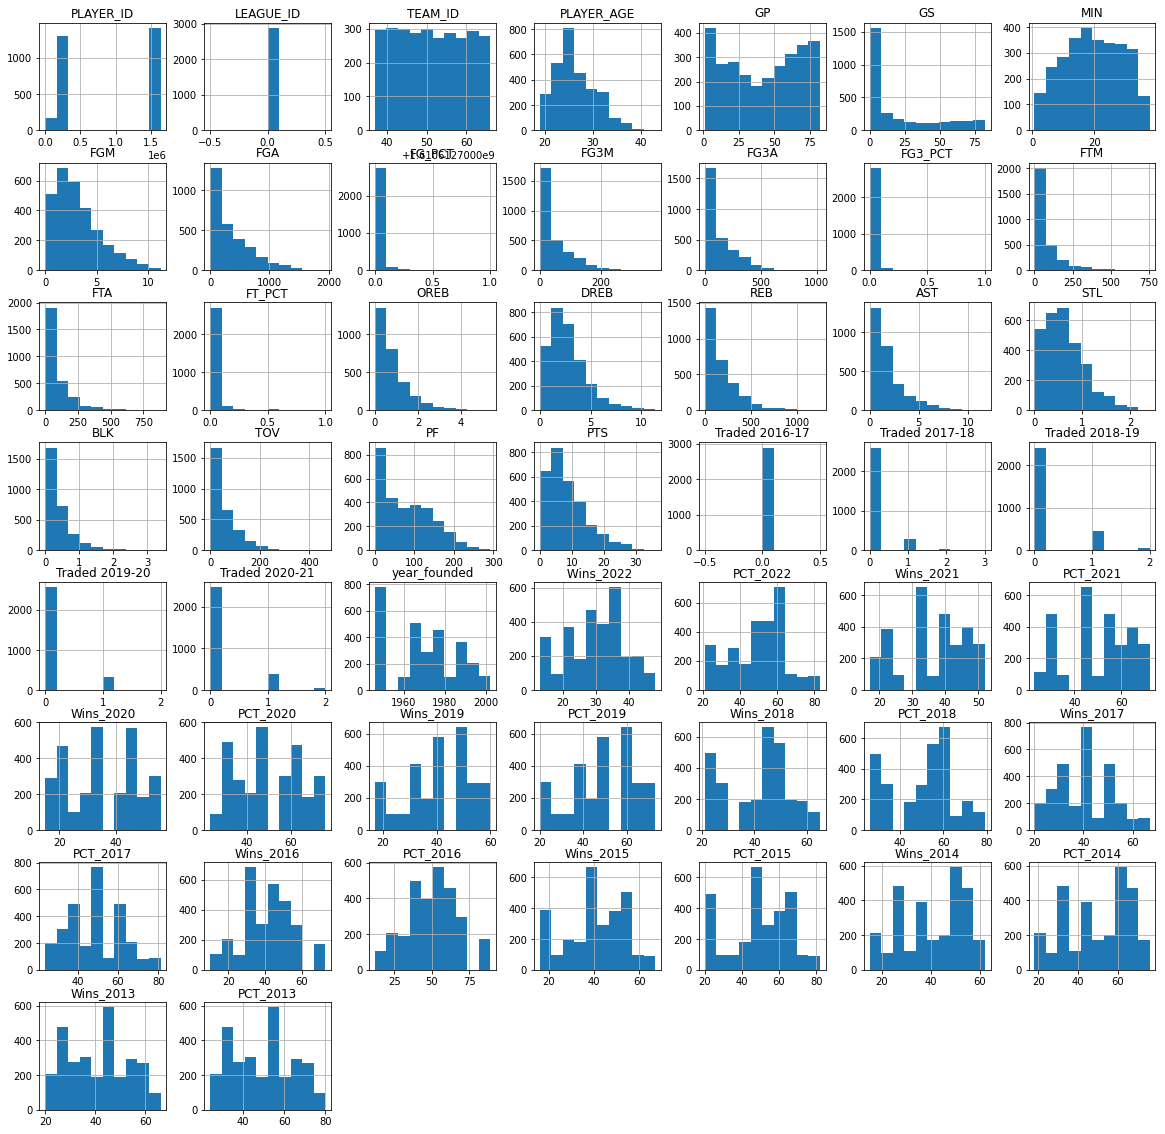

In [31]:
dataDfm.hist(figsize=(20,20))
plt.show()

### Player Distribution of Player Trades Per Team over 5 Seasons

This  visualization confirms the expectation that few players are traded in a season; on average, most players are traded 0 times in a season over the last five complete seasons, and among those who are traded, players traded in a season can be traded between 1-3 times in an individual season.

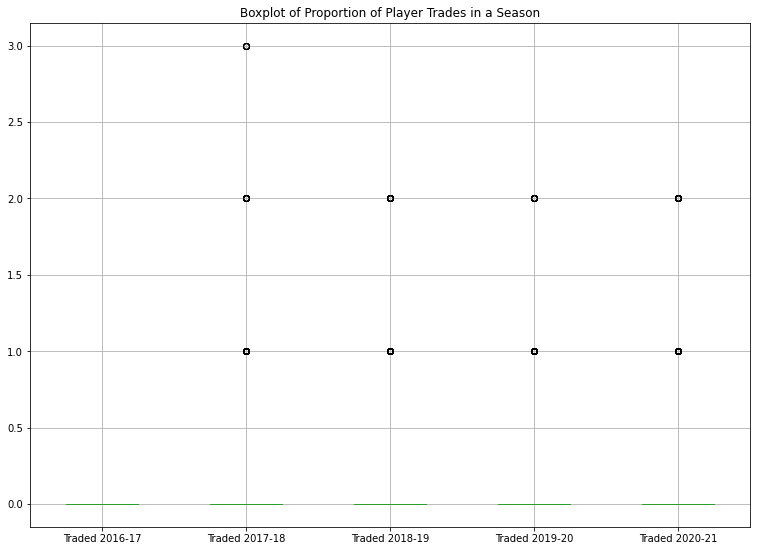

In [32]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = dataDfm.get(trade).boxplot(figsize=(10,10))
plt.title('Boxplot of Proportion of Player Trades in a Season')
# show plot
plt.show()

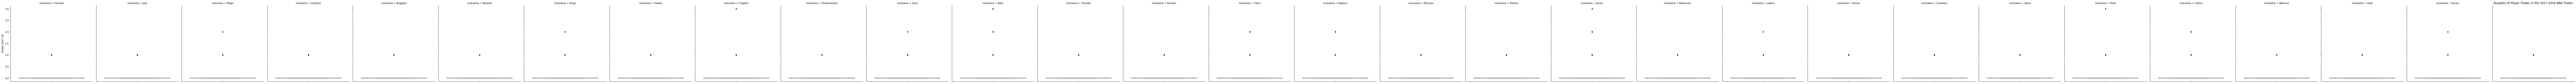

In [33]:
plt2 = sns.catplot(y='Traded 2017-18',
                col="nickname",
                data=dataDfm, kind="box")
plt.title('Boxplots of Player Trades in the 2017-2018 NBA Trades')
plt.show()

#### Dendogram 

This diagram shows hierarchal relationships (ttps://www.displayr.com/what-is-dendrogram/). Note, this is standardized in terms of z-scores. This diagram shows player level characteristics at the indiivdual-level on the left side of the dendogram, and team statistics over the season are shown on the right-side of the dendogram. At this point, the current 2022 season appears to be clustered more closely to 2021, which is the most different from the performance across seasons during the 2018 season.

This dendogram approach is exploratory to see what variables within a dataset cluster together. From this dendogram, it appears that the wins and percent wins are most closely related, since the branches are the narrowest for those two variables. Wins and percent wins in a given season for a player are more closely related to the team performance in the closest season; for example, a team's performance in 2019/2018 is closely related to their performance in the 2021/2022 season, whereas the team's performance from back in 2013-2014 was less closely related to the team's performance in the 2021/2022 season.

As a group, wins/losses are most closely related to overall team performance in a given season. At a game-level, a majority of the player performance metrics clustered together. For example, minutes played is most closely related to points scored per game. Steals per game is most closely clustered with trades in an individual season, blocks, and free-throw percentages. These previously mentioned metrics are more closely related to each other; whereas, turnovers per game, field goals made, free throws made, and total defensive rebound are more closely related to each others, which reflects a group of metrics. 

Overall game performance in a season is then closely related to game-level performance of the player; game performance and game-level performance are more closely related to each other, than total points attempted. 

This exploratory analysis suggests that the number of times a player is traded should be treated as another player performance metric that influences overall wins and win percentage.

C:\Users\jrdaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


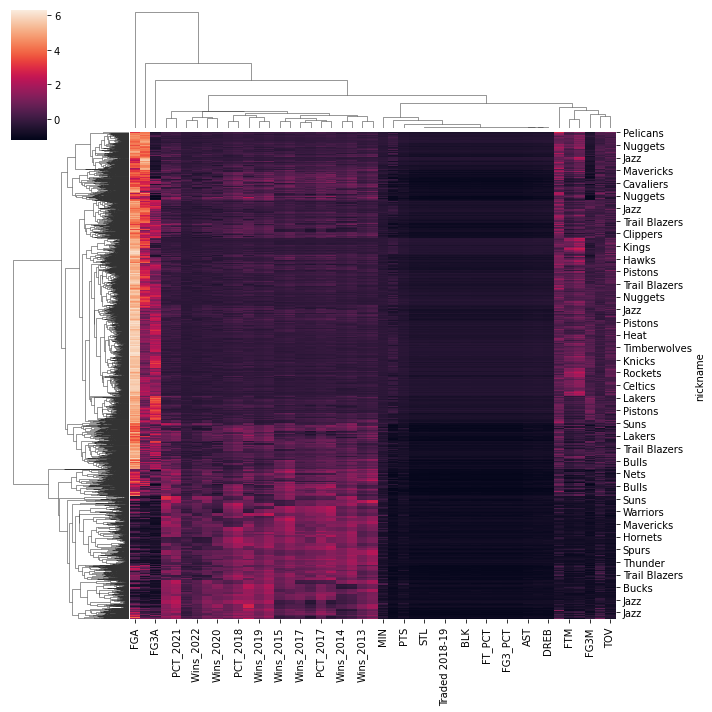

In [34]:
%matplotlib notebook
%matplotlib inline
df = dataDfm
df = df.set_index('nickname')
sns.clustermap(df.drop(columns=['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
                                'TEAM_ABBREVIATION','abbreviation', 'city', 'state',
                                'Team_Name','year_founded']).select_dtypes(include= np.number),
              z_score=0) #drop team identifiers, standardize to z-score since on different scales
plt.show()

### Primary Statistical Analyses 

### Linear Mixed Model Analysis

Description: We are interested in looking at the relationship between whether a player was traded in a given season and whether that was associated with a player's performance in that given season. We are using multiple observations from an individual player over 5 games. 

- **H0:** There is no relationship between a player being traded in a given season and their general performance per game (average performance) in a given season.
- **H1:** There is a relationship between a player being traded in a given season and their average game day performance.

**The equation for model 1:** player performance (y) = times traded + season identifier + team identifier + player identifier

**Random effect in model 1:** player 

**Random intercept in model 1:** team

We've added a random effect into this model, since there are multiple observations from an individual player and this data is correlated. We have also added another random effect from team, since player performance is likely correlated with their team's performance. Player is the most important factor to consider for a random effect, so for simplicity in other analyses, we have ignored clustering at the level of the team. A random intercept was added to the model, since we expect different trajectories per season.

Prior to this data analysis, one trade variable needs to be created, since there are currently multiple columns for trade and each row corresponds to performance ina. given season, so it will be important to ensure the trading variable matches with the season. 

In [35]:
conditions_season = [
    (dataDfm_dedup.get('SEASON_ID')=='2020-21'),
    (dataDfm_dedup.get('SEASON_ID')=='2019-20'),
    (dataDfm_dedup.get('SEASON_ID')=='2018-19'),
    (dataDfm_dedup.get('SEASON_ID')=='2017-18'),
    (dataDfm_dedup.get('SEASON_ID')=='2016-17')
]

choices_trade = [dataDfm_dedup.get('Traded 2020-21'),dataDfm_dedup.get('Traded 2019-20'),dataDfm_dedup.get('Traded 2018-19'),dataDfm_dedup.get('Traded 2017-18'),dataDfm_dedup.get('Traded 2016-17')]
choices_wins = [dataDfm_dedup.get('Wins_2020'),dataDfm_dedup.get('Wins_2019'),dataDfm_dedup.get('Wins_2018'),dataDfm_dedup.get('Wins_2017'),dataDfm_dedup.get('Wins_2016')]
choices_pct = [dataDfm_dedup.get('PCT_2020'),dataDfm_dedup.get('PCT_2019'),dataDfm_dedup.get('PCT_2018'),dataDfm_dedup.get('PCT_2017'),dataDfm_dedup.get('PCT_2016')]

dataDfm_dedup2 = dataDfm_dedup
dataDfm_dedup2["TRADE_ALL"] = np.select(conditions_season, choices_trade)
dataDfm_dedup2["WINS_ALL"] = np.select(conditions_season, choices_wins)
dataDfm_dedup2["PCT_ALL"] = np.select(conditions_season, choices_pct) 

dataDfm_dedup2 = dataDfm_dedup.drop(columns=['Traded 2016-17', 'Traded 2017-18',
       'Traded 2018-19', 'Traded 2019-20', 'Traded 2020-21',' Wins_2022', 'PCT_2022', 'Wins_2021', 'PCT_2021',
       'Wins_2020', 'PCT_2020', 'Wins_2019', 'PCT_2019', 'Wins_2018',
       'PCT_2018', 'Wins_2017', 'PCT_2017', 'Wins_2016', 'PCT_2016',
       'Wins_2015', 'PCT_2015', 'Wins_2014', 'PCT_2014', 'Wins_2013',
       'PCT_2013'])

dataDfm_dedup2['TEAM_ID'] = pd.Categorical(dataDfm_dedup2.get('TEAM_ID'))
dataDfm_dedup2['PLAYER_ID'] = pd.Categorical(dataDfm_dedup2.get('PLAYER_ID'))

In [36]:
print(dataDfm_dedup2.get('SEASON_ID').unique())
print(dataDfm_dedup2.columns)
dataDfm_dedup2.head(5)

['2020-21' '2018-19' '2016-17' '2017-18' '2019-20']
Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'full_name', 'abbreviation', 'nickname',
       'city', 'state', 'year_founded', 'Team_Name', 'TRADE_ALL', 'WINS_ALL',
       'PCT_ALL'],
      dtype='object')


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,full_name,abbreviation,nickname,city,state,year_founded,Team_Name,TRADE_ALL,WINS_ALL,PCT_ALL
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988,Hornets,0,23.0,35.0
1,202714,2018-19,0,1610612766,CHA,29.0,4,0,10.500000,0.500000,...,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988,Hornets,1,36.0,44.0
2,1626163,2016-17,0,1610612766,CHA,24.0,75,16,26.053333,4.266667,...,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988,Hornets,0,48.0,59.0
3,1626163,2017-18,0,1610612766,CHA,25.0,79,4,23.227848,3.886076,...,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988,Hornets,0,36.0,44.0
4,1626163,2018-19,0,1610612766,CHA,26.0,47,0,16.063830,2.936170,...,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988,Hornets,0,36.0,44.0


### Descriptive Statistics

**Overall**:In the NBA, the youngest player is 19 and the oldest is 43 with a mean age of 26 years old. The average number of minutes played for a player in the league over the last five seasons was 20 minutes; quartiles of these player performance metrics are also shown below. The average field goals made was 3.15 per game; the average field goal percentage per game was 3%, which is relatively low, with a max of 100%. In an average game, a player made an average of 0.40 blocks, which is likely due to some players not playing as often as other players, and certain players are not defensively focused. The average points made in a game by a player is 8.5 points per game with the max average being 36 points and min being 0 points. On average, players are traded 0.22 times per season, so most players are rarely traded in a season, but some are traded from 0-3 times in a given season.

In total, most players were on teams that won on average 40 games in a season, where the minimum number of games won in a season was 10 in this dataset over the last five seasons. The percentage of wins on average over these 5 seasons was 49.79% with a minimum of 12% of games and a maximum of 89% of games won.

**Statistics Grouped by Times Traded**: On average, players that are traded 0 times in a season play on average 47 games, compared to those traded 1-3 times who play on average 22, 12, and 13 games. Players traded once in a season play only one minute less than players who were not traded, but play on average 6 minutes in a season if they are traded 3 times. Players who are not traded make more attempted shots and have higher performance than players traded (field goals made: 3.26 vs. 2.77/1.97,2.47). There is noticable lower TOV among players on average compared to the rest of the players, but this may be due to traded players playing less on average than most players. They make slighly less points than players who are not traded on average; players who are traded are on teams that win a lower percentage of wins but only slightly.

In [37]:
print(dataDfm_dedup2.describe(include='all').drop(columns=['SEASON_ID','TEAM_ID','TEAM_ABBREVIATION','LEAGUE_ID','Team_Name','abbreviation','full_name','nickname']))
print(dataDfm_dedup2.groupby('TRADE_ALL').mean())

        PLAYER_ID   PLAYER_AGE           GP           GS          MIN  \
count      2892.0  2892.000000  2892.000000  2892.000000  2892.000000   
unique      875.0          NaN          NaN          NaN          NaN   
top      203516.0          NaN          NaN          NaN          NaN   
freq          8.0          NaN          NaN          NaN          NaN   
mean          NaN    26.347165    41.934647    20.011411    19.528798   
std           NaN     4.132593    25.641602    25.605342     9.243275   
min           NaN    19.000000     1.000000     0.000000     0.666667   
25%           NaN    23.000000    18.000000     0.000000    12.368687   
50%           NaN    26.000000    44.000000     6.000000    19.386275   
75%           NaN    29.000000    65.000000    35.000000    27.287815   
max           NaN    43.000000    82.000000    82.000000    37.770270   

                FGM          FGA       FG_PCT         FG3M         FG3A  ...  \
count   2892.000000  2892.000000  2892.0000

#### Description of the Model Optimization

The model below converged but it required a nm optimization method. Also, the error message appears to be because the random effect is close to 0, so it may arguable be removed?

Also, "since each optimization inside the profile likelihood generates a warning (due to the random slope variance being close to zero), we turn off the warnings here." See this reference: https://www.statsmodels.org/0.8.0/examples/notebooks/generated/mixed_lm_example.html

#### Conclusion from this Model:

This model only runs when the player id is numeric; otherwise, the model does not converge.

Although theoretically, you would want to account for the correlated measurements since there are repeated measurements for an individual player. This linear mixed model is overfitted. Changing the random_intercept to team id instead of the player id produces the same error. The distribution for minutes player per game is roughly normal distributed, so the outcome cannot be improved. Also, the player variance term is close to 0, which means we can likely ignore player-level correlation. The next model to try will be a model with the random intercept as the team with repeated measures for the team instead of the player.

Player category has too many characters; there are other approaches that would better handle this situation.

In [38]:
# md1 = smf.mixedlm("MIN~TRADE_ALL+TEAM_ID+PLAYER_ID+SEASON_ID", dataDfm_dedup2, groups=dataDfm_dedup2["PLAYER_ID"], re_formula="~PLAYER_ID")
# mdf1 = md1.fit(method='nm',maxiter=500) #still get non-positive hessian matrix error
# print(mdf1.summary())

**Conclusion from this Model:**

The random intercept for the team is helpful but the model is not stable with this random intercept and is likely overfitted. I am transitioning to a linear regression, since accounting for this clustering is overfitting the model.

In [39]:
# md1 = smf.mixedlm("MIN~TRADE_ALL+TEAM_ID+SEASON_ID", dataDfm_dedup2, groups=dataDfm_dedup2["TEAM_ID"], re_formula="~TEAM_ID")
# mdf1 = md1.fit(method='nm',maxiter=100) #still get non-positive hessian matrix error
# print(mdf1.summary())

### Linear Regression of Number of Trades vs. Player Performance

We will consider the same model specification as the early models, but we will try to avoid overfitting by removing random intercepts and clustering, since the model is not converging, and the coefficient for players is practically 0.

H0: There is no relationship between the number of times traded in a season and player performance.
H1: There is a relationship between the number of times traded in a season and player performance.

Team is not significant in this model, and we are not hypothesizing that it is likely changing the relationship, but we checked to be consistent. We are more interested in differences in minutes played based on player id.

In [40]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols("MIN~TRADE_ALL+TEAM_ID+SEASON_ID", dataDfm_dedup2)
model = model.fit()
#print(model.summary())

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq      df          F        PR(>F)
TEAM_ID      1650.753371    29.0   0.673078  9.065161e-01
SEASON_ID    1097.240764     4.0   3.243570  1.152551e-02
TRADE_ALL    2177.057437     1.0  25.742529  4.151131e-07
Residual   241617.799610  2857.0        NaN           NaN


Player is highly significant, but we are still concerned about duplicate measurements from multiple seasons. We will stratify the analysis by season for this relationship.

Overall, p-values are shown in this table.

           sum_sq      df          F         PR(>F)

PLAYER_ID  186743.670219   874.0   7.605412  3.153581e-306


SEASON_ID     330.359850     4.0   2.939785   1.947006e-02


TRADE_ALL     519.083804     1.0  18.476759   1.802016e-05


Residual    56524.882762  2012.0        NaN            NaN

It appears that player identifier predicts time played, and whether they were traded has the highest F-statistic in the model. The R-squared shows that 77.1% of the variance in this model is fit by these three terms. After dropping the times traded term, the variance explained drops to 76.9%, so traded drops the variance explained very slightly.

**Interpretation:** For every time a player is traded in a given season, the total number of minutes that they play a game on average is 1.30 minutes (se=0.03) in a given game. This amount of time is very slight, since in a given game, the standard error for most of these players in a game is between 3-5 minutes.

In [41]:
##team id was not significant so removing term; all teams play the same amount of time, player id is a stronger identifier
model = smf.ols("MIN~TRADE_ALL+PLAYER_ID+SEASON_ID", dataDfm_dedup2)
model = model.fit()
print(model.summary())

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#commenting this portion of the code out to save space. 
model = smf.ols("MIN~PLAYER_ID+SEASON_ID", dataDfm_dedup2)
model = model.fit()
#print(model.summary())

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                    MIN   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     7.713
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          5.27e-311
Time:                        21:47:10   Log-Likelihood:                -8402.1
No. Observations:                2892   AIC:                         1.856e+04
Df Residuals:                    2012   BIC:                         2.382e+04
Df Model:                         879                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               19.3473 

                  sum_sq      df          F         PR(>F)
PLAYER_ID  186743.670219   874.0   7.605412  3.153581e-306
SEASON_ID     330.359850     4.0   2.939785   1.947006e-02
TRADE_ALL     519.083804     1.0  18.476759   1.802016e-05
Residual    56524.882762  2012.0        NaN            NaN
                  sum_sq      df         F         PR(>F)
PLAYER_ID  188198.935778   874.0  7.598709  4.591340e-306
SEASON_ID     660.710346     4.0  5.828881   1.158637e-04
Residual    57043.966566  2013.0       NaN            NaN


For the rest of the models, I will supress the table summary, since github shows the full table, but I will summarize the results.

**Points in a Game**: The model explains 95% of the variance in the model. On average, every minute played contributed to half a point being scored on average per player. After adjusting for player id, season, and minutes played, the total times traded was associated with the number of points scored per game. For every time a player was traded, they scored 0.23 times less per time traded.

    coef    std err          t      P>|t|      [0.025      0.975]

MIN                      0.4855      0.007     69.281      0.000       0.472       0.499

TRADE_ALL               -0.2306      0.096     -2.392      0.017      -0.420      -0.042

**Turnovers**: The model explains 85% of the variance in the model. For every time that the player was traded, they were likely to be involved in 24 less turnovers on average after adjusting for player id, season, and minutes played. On average, players have -19 turnovers per game, where some players contribute to greater turnovers. For every minute played, the player has an average of 3 turnovers, so if a player plays at least 7 minutes, then they are likely to have had at least one turnover. If they had been traded once in a season, and assuming that player had been played in the court and was not warming the bench, then that player would not have a turnover until minute 15 as compared to minute 7 for non-traded players. 

    coef    std err          t      P>|t|      [0.025      0.975]
MIN                      3.0434      0.110     27.550      0.000       2.827       3.260

TRADE_ALL              -24.6288      1.520    -16.207      0.000     -27.609     -21.648

In [42]:
#commenting this portion of the code out to save space. 
model = smf.ols("PTS~PLAYER_ID+SEASON_ID+MIN+TRADE_ALL", dataDfm_dedup2)
model = model.fit()
# print(model.summary())
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df            F         PR(>F)
PLAYER_ID  19546.019429   874.0     8.055124  4.940656e-323
SEASON_ID     97.971466     4.0     8.821957   4.647185e-07
MIN        13326.128863     1.0  4799.868467   0.000000e+00
TRADE_ALL     15.885315     1.0     5.721648   1.684833e-02
Residual    5583.245734  2011.0          NaN            NaN


In [43]:
dataDfm_dedup2.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'full_name', 'abbreviation', 'nickname',
       'city', 'state', 'year_founded', 'Team_Name', 'TRADE_ALL', 'WINS_ALL',
       'PCT_ALL'],
      dtype='object')

In [44]:
#commenting this portion of the code out to save space. 
model = smf.ols("TOV~PLAYER_ID+SEASON_ID+MIN+TRADE_ALL", dataDfm_dedup2)
model = model.fit()
#print(model.summary())
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df           F         PR(>F)
PLAYER_ID  2.482242e+06   874.0    4.117454  1.465821e-150
SEASON_ID  9.212044e+04     4.0   33.388121   5.313546e-27
MIN        5.235420e+05     1.0  759.010047  4.972474e-142
TRADE_ALL  1.811700e+05     1.0  262.652859   1.293932e-55
Residual   1.387127e+06  2011.0         NaN            NaN


### Linear Regression of Number of Trades vs. Team Win Rate

Firstly, we do not have number of trades per team, but we have the number of total trades per play per team. We expected that there would be some corrolation between the number of overall trades of a team and their win rate.

We need to first gather some more data and somehow normalize the 'win rate' since other teams may have more or less games played in a regular season.

The cell below gathers some data such as total number of trades and we normalize wins by dividing Wins by Win percentage for that respective year.

In [46]:
dataDfmCpy = dataDfm.copy() #Copy df so we don't modify the original
years = ['2016', '2017', '2018', '2019', '2021']
team_names = []

# Gathers every nickname of the team
for names in dataDfmCpy['nickname']:
    team_names.append(names)
    
team_names = list(dict.fromkeys(team_names))

# Initialize each year Wins/Win% 
for y in years:
    dataDfmCpy['Wins/Win%_' + y] = 0
    
for y in years:
    for n in team_names:
        dataDfmCpy.loc[(dataDfmCpy['nickname'] == n), ['Wins/Win%_' + y]] = dataDfmCpy.loc[(dataDfmCpy['nickname']==n), ['Wins_'+ y]].iloc[0][0] / dataDfmCpy.loc[(dataDfmCpy['nickname']==n),['PCT_' + y]].iloc[0][0]

dataDfmCpy

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,PCT_2015,Wins_2014,PCT_2014,Wins_2013,PCT_2013,Wins/Win%_2016,Wins/Win%_2017,Wins/Win%_2018,Wins/Win%_2019,Wins/Win%_2021
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,40.0,43.0,52.0,27.0,33.0,0.813559,0.818182,0.818182,0.812500,0.733333
1,202714,2018-19,0,1610612766,CHA,29.0,4,0,10.500000,0.500000,...,40.0,43.0,52.0,27.0,33.0,0.813559,0.818182,0.818182,0.812500,0.733333
2,1626163,2016-17,0,1610612766,CHA,24.0,75,16,26.053333,4.266667,...,40.0,43.0,52.0,27.0,33.0,0.813559,0.818182,0.818182,0.812500,0.733333
3,1626163,2017-18,0,1610612766,CHA,25.0,79,4,23.227848,3.886076,...,40.0,43.0,52.0,27.0,33.0,0.813559,0.818182,0.818182,0.812500,0.733333
4,1626163,2018-19,0,1610612766,CHA,26.0,47,0,16.063830,2.936170,...,40.0,43.0,52.0,27.0,33.0,0.813559,0.818182,0.818182,0.812500,0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,1627817,2016-17,0,1610612757,POR,22.0,16,0,5.000000,0.812500,...,62.0,54.0,66.0,33.0,40.0,0.814815,0.820000,0.816667,0.815385,0.724138
2888,1627834,2017-18,0,1610612757,POR,20.0,1,0,4.000000,1.000000,...,62.0,54.0,66.0,33.0,40.0,0.814815,0.820000,0.816667,0.815385,0.724138
2889,1627884,2020-21,0,1610612757,POR,24.0,58,43,22.724138,2.534483,...,62.0,54.0,66.0,33.0,40.0,0.814815,0.820000,0.816667,0.815385,0.724138
2890,202683,2018-19,0,1610612757,POR,27.0,23,8,22.260870,5.391304,...,62.0,54.0,66.0,33.0,40.0,0.814815,0.820000,0.816667,0.815385,0.724138


Now we collect all the trades of each team per year/season

In [47]:
# Initialize Total Team trades to 0
for y in years:
    dataDfmCpy['Tot_Team_Trades_'+y] = 0

# Go through each team and for each year get sum the trades and add to respective column
for n in team_names:   
    for t in trade:
        nums = dataDfmCpy[dataDfmCpy['nickname']==n][t].sum()
        dataDfmCpy.loc[(dataDfmCpy['nickname'] == n), ['Tot_Team_Trades_'+ t[7:-3]]] = nums

# Drop duplicates to remove clutter       
dataDfmCpyDup = dataDfmCpy.drop_duplicates(subset='nickname')
dataDfmCpyDup

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,Wins/Win%_2017,Wins/Win%_2018,Wins/Win%_2019,Wins/Win%_2021,Tot_Team_Trades_2016,Tot_Team_Trades_2017,Tot_Team_Trades_2018,Tot_Team_Trades_2019,Tot_Team_Trades_2021,Tot_Team_Trades_2020
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,0.818182,0.818182,0.812500,0.733333,0,6,3,10,0,1.0
82,202714,2016-17,0,1610612762,UTA,27.0,55,9,21.909091,3.090909,...,0.822581,0.827586,0.819672,0.722222,0,11,11,12,0,8.0
173,202714,2017-18,0,1610612753,ORL,28.0,69,3,19.782609,2.579710,...,0.828571,0.833333,0.823529,0.724138,0,6,10,6,0,41.0
269,202714,2018-19,0,1610612763,MEM,29.0,53,3,22.716981,3.037736,...,0.826923,0.814815,0.825000,0.716981,0,12,29,13,0,6.0
376,1630210,2020-21,0,1610612743,DEN,22.0,37,1,5.540541,1.081081,...,0.816327,0.821429,0.818182,0.723077,0,6,6,17,0,17.0
470,1630216,2020-21,0,1610612764,WAS,23.0,22,0,4.454545,0.636364,...,0.816667,0.826923,0.820513,0.723404,0,4,27,18,0,16.0
568,1630218,2020-21,0,1610612758,SAC,21.0,13,0,3.461538,0.615385,...,0.820513,0.818182,0.812500,0.720930,0,11,23,20,0,26.0
669,1630219,2020-21,0,1610612737,ATL,23.0,33,0,8.151515,1.333333,...,0.826923,0.827586,0.828571,0.719298,0,6,11,14,0,11.0
766,2037,2016-17,0,1610612746,LAC,37.0,82,1,26.304878,4.378049,...,0.822581,0.823529,0.827586,0.723077,0,14,24,8,0,19.0
860,2037,2017-18,0,1610612750,MIN,38.0,80,0,20.662500,3.850000,...,0.815789,0.824561,0.818182,0.718750,0,6,9,32,0,14.0


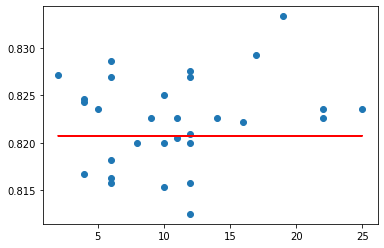

In [49]:
plt.scatter(dataDfmCpyDup['Tot_Team_Trades_2017'], dataDfmCpyDup['Wins/Win%_2017'] )
res = stats.linregress(list(dataDfmCpyDup['Tot_Team_Trades_2017']), list(dataDfmCpyDup['Wins/Win%_2017'] ))
plt.plot(np.array(list(dataDfmCpyDup['Tot_Team_Trades_2017'])), res.intercept + res.slope * np.array(list(dataDfmCpyDup['Wins/Win%_2017'])), color='red')
plt.show()

In conclusion, here we can clearly see the data seems to have no corrolation in nature. They just seem to be spread out fairly evenly and fitting a line to the data gives us a slope of 0. Therefore, there is no corrolation between the number of trades per player per team vs the team Win/Win percentage.

# Ethics & Privacy

* ***Ethics:*** One ethical concern is the use of our predictive model of the player and team performance for gambling. If we make this program publically available, it will be important to write disclaimers about the use of this model for gambling, since our model is not optimized for making money. Those who engage in online gambling may attempt to use this model to place bets but that is ill-advised since this analysis is largely exploratory. We don't have any concerns about privacy since this data is publically available and is de-identified. Alternatively, another key consideration is that this model may demonstrate that players that are heavily traded are undesirable, so this research may identify the player as undesirable and may slander the athlete, which could potentially impact the future earnings of NBA players. This analysis may potentially lead particular athletes who are heavily traded to be viewed negatively by the public. 

* ***Privacy:*** Player statistics are generally publicized in the news and are a part of player contracts; they are not protected personal information and cannot be used to identify other private information about individual players. 

# Conclusion & Discussion

Our analysis suggests that the number of times a player is traded is a player statistic that should be considered in predicting that player's game-day performance, and it may be worthwhile for teams to be thoughtful in their process of trading players. The number of times a player was traded clustered together with other performance metrics, including blocks, assists, field goals made, etc. However, given this information, we are unable to accept our hypothesis. We were unable to obtain any evidence that stated an NBA player that got traded more will perform worse compared to a non-traded NBA player. 
We weren’t able to notice teams performing worse from trading more often. However we learned that players who are traded are more often on losing teams. The strongest possible relationship that we observed in our data is that players who are traded have noticeably less turnovers than average players who are traded; this may be a consequence of team dynamics. One possible explanation for traded players having less turnovers after accounting for time played is that they are passed the ball less by their new teammates. This is consistent with our finding that traded players make far less field goal attempts than other non-traded players in a season, since this correlation may reflect just having less ball-time. Teammates on a basketball team receiving the traded player may be less trusting of this player, until that player has not demonstrated their ability to the rest of their team. In general, it also appears that traded players play fewer minutes than non-traded players. Players who are on losing teams may be more at risk of being traded than players on winning teams. If a player is traded, then this will likely affect their opportunity to play for that season or vice-versa.
Limitations to our project is that we are just looking for correlation between two variables. Even if we are to draw a conclusion that there is a difference, we can't prove it.

# Team Contributions

***Alexis:*** Developed the research hypothesis with team. Developed data cleaning approach with James and Jamie. Contributed to data cleaning (e.g.developed code to pull from NBA_API and how to use information or keys from one dataset to access another dataset, and worked with James to pull from the NBA_API and prepare the dataset for analysis). Conducted exploratory data analysis (summary statistics section in the exploratory data analysis section (summarized trends in trading at the season level), exploratory data analysis (data distributions), player distributions, and dendogram). Designed the statistical analysis plan with James and Jaimie. In terms of the statistical analysis, I implemented the descriptive statistics, linear mixed model, and the section titled "Linear Regression of Number of Trades vs. Player Performance."

***Jamie:*** Helped write background information and prior works, figured out some of the approaches and the logistics to the project. Found the variables necessary. Created a dataset including the wins for an NBA team and the win percentage over the last 10 years. Created a spaghetti plot to show the difference between nba players who got traded and who didn't get traded. Wrote part of the conclusion.

**James Daza:** Pulled most of the data through the API. Did some data manipulation to gather trades of players per season and also number of trades per player per team. Sifted through the data gathered and cleaned up the data to the stats that Jamie and Alexis wanted to work with. Worked on the Linear Regression of the trades per team vs their win/win rate. 